In [1]:
## Load data
import glob
import pandas as pd
import pickle

df = pd.read_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/1_2_model_input_ws60min_ph60min.csv')


# Define the path to your folder
folder_path = '/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_wb/2_1_1_predicted_results_rnn_wb_v4'
# Pattern to match the files
file_pattern = f'{folder_path}/patient*_ratio*.pkl'

# Dictionary to store the data
dictionary = {}

goat = 2

# Iterate over files matched by glob
for file_path in glob.glob(file_pattern):
    with open(file_path, 'rb') as file:
        # Extracting N and X from the filename
        filename = file_path.split('/')[-1]  # Adjust if necessary based on your OS
        patient_id, ratio_id = filename.replace('.pkl', '').split('_')
        # Extracting numeric parts from patient_id and ratio_id
        patient_num = ''.join(filter(str.isdigit, patient_id))
        ratio_num = ''.join(filter(str.isdigit, ratio_id))
        
        # Load the content of the file
        file_data = pickle.load(file)

        # Store the data
        dictionary.update(file_data)

# Now loaded_data contains all your files' data

In [2]:
from random import uniform

import matplotlib.pyplot as plt

from methcomp import seg, segscores

ref = [uniform(2, 18) for _ in range(300)]
test = [uniform(2, 18) for _ in range(300)]

zones = segscores(ref, test, units="mmol")
print("SEG scores: {}".format(zones))




SEG scores: [2.0102e-01 1.1425e+00 9.5674e-01 8.8295e-01 9.8728e-01 7.0992e-01
 4.0458e-01 2.0636e+00 9.9237e-01 1.4707e+00 1.8575e+00 1.3104e+00
 1.8601e+00 2.1120e-01 9.1603e-01 2.0051e+00 2.3995e+00 1.1781e+00
 3.2188e+00 5.4198e-01 3.4351e-01 1.5318e+00 2.8499e-01 3.2137e+00
 2.4784e+00 9.1858e-01 3.4326e+00 1.1272e+00 1.7226e+00 1.4962e+00
 2.2672e+00 2.7379e+00 0.0000e+00 1.2290e+00 2.3919e-01 0.0000e+00
 1.4758e+00 2.0356e-02 4.4529e-01 2.2901e-01 0.0000e+00 1.8142e+00
 1.5318e+00 2.8499e-01 8.3969e-01 1.9262e+00 1.2545e+00 1.7812e+00
 4.8346e-01 1.5802e+00 2.1120e+00 2.6081e+00 2.3740e+00 6.9720e-01
 1.7557e-01 2.2163e+00 2.0204e+00 2.4682e-01 2.2799e+00 1.4936e+00
 2.6005e+00 8.6005e-01 2.3919e-01 1.3461e+00 1.5471e+00 6.9720e-01
 8.6768e-01 1.4580e+00 1.6870e+00 3.0280e-01 6.2850e-01 1.8626e+00
 1.1247e+00 9.6947e-01 1.2137e+00 1.8321e-01 7.2265e-01 4.4529e-01
 1.7557e-01 6.4631e-01 1.0789e+00 2.8601e+00 1.7405e+00 1.4122e+00
 7.3791e-01 5.0891e-01 6.0560e-01 2.1628e-01 1.412

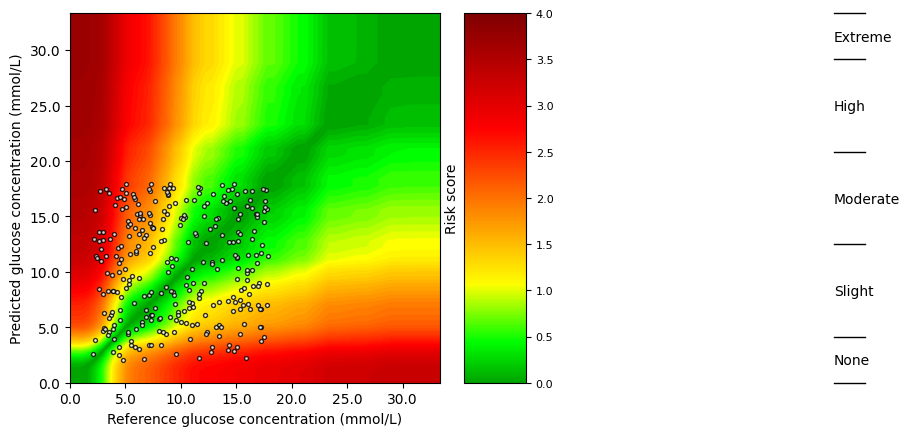

In [3]:
seg(ref, test, units="mmol", percentage=False)
plt.show()